# Predicting Chronic Disease: Data Wrangling

This project combines data from the Center for Disease Control's [500 Cities: Local Data for Better Health](https://www.cdc.gov/500cities/) and the U.S. Census Bureau's [American Community Survey 5-year Data](https://www.census.gov/data/developers/data-sets/acs-5year.html)(ACS). The 500 Cities Project contains 28,004 census tract-level observations on 5 unhealthy behaviors, 13 health outcomes, and 9 prevention practices ([see table below](#500-Cities-Health-Measures)). This dataset was originally download from Data.gov ([https://catalog.data.gov/dataset/500-cities-local-data-for-better-health-b32fd](https://catalog.data.gov/dataset/500-cities-local-data-for-better-health-b32fd)) on August 11, 2018.

The *health outcomes* will serve as the target, while the unhealth behavior, prevention practices, and ACS variables will serve as features. The ACS data provides 16,557 census-tract level variables. I have chosen 416 of those variables to serve as features. The ACS variables cover an array of demographic information in the categories of age, sex, race, disability status, education, marital status, health insurance coverage, and economic indicators. 

## 500 Cities Health Measures

|No| Prevention Measures                            | Unhealthy Behaviors               | Health Outcomes                |
|--|------------------------------------------------|-----------------------------------|--------------------------------|
|1 | Current lack of health insurance               | Binge drinking                    | Arthritis                      |
|2 | Routine checkup within the past year           | Current smoking                   | Asthma                         |
|3 | Visits to dentist or dental clinic             | No leisure-time physical activity | High blood pressure            |
|4 | Taking medicine for high blood pressure control| Obesity                           | Cancer (excluding skin cancer) |
|5 | Cholesterol screening                          | Sleeping less than 7 hours        | High cholesterol               | 
|6 | Mammography                                    | -                                 | Chronic kidney disease         |
|7 | Papanicolaou smear                             | -                   | Chronic obstructive pulmonary disease (COPD) |
|8 | Fecal occult blood test, sigmoidoscopy, or colonoscopy | -                         | Coronary heart disease         |
|9 | Older adults aged≥65 years who are up to date on a core set of clinical preventive services (male / female) |-| Diabetes |
|10| -                                              | -                          | Mental health not good for >= 14 days |
|11| -                                              | -                         | Physical health not good for >= 14 days|
|12| -                                              | -                   | All teeth lost among adults aged >= 65 years |
|13| -                                              | -                                  | Stroke                        | 



## Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

## Set Display Options, API Key

In [481]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

API_KEY = 'XXXXXXXXXXXX-XXXX'

## Acquire & Clean 500 Cities Data

In [3]:
# create dataframe from 500 Cities dataset
cdc_all_df = pd.read_csv('data/500_Cities__Local_Data_for_Better_Health__2017_release.csv')

# create dataframe from subset of 500 Cities data that only contains tract-level data
cdc_tract_df = cdc_all_df[cdc_all_df.GeographicLevel == 'Census Tract']
cdc_tract_df.sample(10)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
768722,2014,VA,Virginia,Chesapeake,Census Tract,BRFSS,Prevention,5116000-51550020804,Visits to dentist or dental clinic among adults aged >=18 Years,%,CrdPrv,Crude prevalence,78.1,75.5,80.4,NaN,NaN,6814.0,"(36.7393719943, -76.1771778625)",PREVENT,DENTAL,5116000.0,5.155002e+10,Dental Visit
319035,2014,IL,Illinois,Chicago,Census Tract,BRFSS,Prevention,1714000-17031390300,Papanicolaou smear use among adult women aged 21–65 Years,%,CrdPrv,Crude prevalence,74.4,71.3,77.3,NaN,NaN,2743.0,"(41.8132006244, -87.6042089035)",PREVENT,PAPTEST,1714000.0,1.703139e+10,Pap Smear Test
334336,2014,IN,Indiana,Bloomington,Census Tract,BRFSS,Prevention,1805860-18105000402,Mammography use among women aged 50–74 Years,%,CrdPrv,Crude prevalence,67.4,62.7,71.4,NaN,NaN,3273.0,"(39.1447413798, -86.5556375059)",PREVENT,MAMMOUSE,1805860.0,1.810500e+10,Mammography
661144,2015,TN,Tennessee,Memphis,Census Tract,BRFSS,Prevention,4748000-47157009902,Cholesterol screening among adults aged >=18 Years,%,CrdPrv,Crude prevalence,68.8,66.2,71.4,NaN,NaN,2851.0,"(35.2041141278, -90.0395284402)",PREVENT,CHOLSCREEN,4748000.0,4.715701e+10,Cholesterol Screening
9599,2015,AL,Alabama,Tuscaloosa,Census Tract,BRFSS,Health Outcomes,0177256-01125011200,Arthritis among adults aged >=18 Years,%,CrdPrv,Crude prevalence,8.4,7.9,9.1,NaN,NaN,7031.0,"(33.2123492462, -87.5387175319)",HLTHOUT,ARTHRITIS,177256.0,1.125011e+09,Arthritis
90513,2015,CA,California,Long Beach,Census Tract,BRFSS,Prevention,0643000-06037576302,Current lack of health insurance among adults aged 18–64 Years,%,CrdPrv,Crude prevalence,26.8,23.3,30.7,NaN,NaN,4101.0,"(33.7789718697, -118.182848872)",PREVENT,ACCESS2,643000.0,6.037576e+09,Health Insurance
780463,2015,VA,Virginia,Virginia Beach,Census Tract,BRFSS,Health Outcomes,5182000-51810046211,Diagnosed diabetes among adults aged >=18 Years,%,CrdPrv,Crude prevalence,10.4,9.6,11.2,NaN,NaN,3063.0,"(36.8037382395, -76.1653023583)",HLTHOUT,DIABETES,5182000.0,5.181005e+10,Diabetes
633237,2014,PA,Pennsylvania,Philadelphia,Census Tract,BRFSS,Prevention,4260000-42101024100,Older adult men aged >=65 Years who are up to date on a core set of clinical preventive services...,%,CrdPrv,Crude prevalence,21.0,16.8,26.1,NaN,NaN,1433.0,"(40.0332734159, -75.1759174745)",PREVENT,COREM,4260000.0,4.210102e+10,Core preventive services for older men
295895,2014,ID,Idaho,Meridian,Census Tract,BRFSS,Unhealthy Behaviors,1652120-16001010332,Sleeping less than 7 hours among adults aged >=18 Years,%,CrdPrv,Crude prevalence,29.8,27.9,31.5,NaN,NaN,11379.0,"(43.6357388091, -116.397089717)",UNHBEH,SLEEP,1652120.0,1.600101e+10,Sleep < 7 hours
643158,2015,PA,Pennsylvania,Reading,Census Tract,BRFSS,Health Outcomes,4263624-42011002600,Coronary heart disease among adults aged >=18 Years,%,CrdPrv,Crude prevalence,8.7,8.1,9.3,NaN,NaN,3330.0,"(40.3226677497, -75.9424101091)",HLTHOUT,CHD,4263624.0,4.201100e+10,Coronary Heart Disease


### Explore Column Data

In [4]:
cdc_tract_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782047 entries, 58 to 810102
Data columns (total 24 columns):
Year                          782047 non-null int64
StateAbbr                     782047 non-null object
StateDesc                     782047 non-null object
CityName                      782047 non-null object
GeographicLevel               782047 non-null object
DataSource                    782047 non-null object
Category                      782047 non-null object
UniqueID                      782047 non-null object
Measure                       782047 non-null object
Data_Value_Unit               782047 non-null object
DataValueTypeID               782047 non-null object
Data_Value_Type               782047 non-null object
Data_Value                    761376 non-null float64
Low_Confidence_Limit          761376 non-null float64
High_Confidence_Limit         761376 non-null float64
Data_Value_Footnote_Symbol    20671 non-null object
Data_Value_Footnote           20671 non

In [5]:
# check Category values
cdc_tract_df.Category.unique()

array(['Prevention', 'Health Outcomes', 'Unhealthy Behaviors'],
      dtype=object)

In [6]:
# check DataSource values
cdc_tract_df.DataSource.unique()

array(['BRFSS'], dtype=object)

In [7]:
# create dictionary of Measure ID and full name
measure_dict = dict(zip(list(cdc_tract_df.MeasureId.unique()), list(cdc_tract_df.Measure.unique())))
measure_dict

{'ACCESS2': 'Current lack of health insurance among adults aged 18–64 Years',
 'ARTHRITIS': 'Arthritis among adults aged >=18 Years',
 'BINGE': 'Binge drinking among adults aged >=18 Years',
 'OBESITY': 'Obesity among adults aged >=18 Years',
 'BPHIGH': 'High blood pressure among adults aged >=18 Years',
 'BPMED': 'Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure',
 'CANCER': 'Cancer (excluding skin cancer) among adults aged >=18 Years',
 'CASTHMA': 'Current asthma among adults aged >=18 Years',
 'CHD': 'Coronary heart disease among adults aged >=18 Years',
 'CHECKUP': 'Visits to doctor for routine checkup within the past Year among adults aged >=18 Years',
 'CHOLSCREEN': 'Cholesterol screening among adults aged >=18 Years',
 'COLON_SCREEN': 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50–75 Years',
 'COPD': 'Chronic obstructive pulmonary disease among adults aged >=18 Years',
 'CSMOKING': 'Current smokin

In [8]:
# check Measure value counts
cdc_tract_df.Measure.value_counts()

Visits to dentist or dental clinic among adults aged >=18 Years                                                                                                                                   28004
Arthritis among adults aged >=18 Years                                                                                                                                                            28004
Stroke among adults aged >=18 Years                                                                                                                                                               28004
Visits to doctor for routine checkup within the past Year among adults aged >=18 Years                                                                                                            28004
Cancer (excluding skin cancer) among adults aged >=18 Years                                                                                                                                       28004


In [9]:
# print summary info on any missing data
print('Missing Data')
print('-'*50)
n = 28004

for key, val in dict(cdc_tract_df.MeasureId.value_counts()).items():
    if n - val > 0:
        print(key + ' : ' + str(n - val) + ' | ' + '{:.2f}'.format((n-val)/n*100) + '%')

Missing Data
--------------------------------------------------
ACCESS2 : 33 | 0.12%
PAPTEST : 94 | 0.34%
COLON_SCREEN : 159 | 0.57%
MAMMOUSE : 279 | 1.00%
TEETHLOST : 405 | 1.45%
COREM : 542 | 1.94%
COREW : 553 | 1.97%


In [10]:
# create a list of Measure related to outcomes
outcomes = list(cdc_tract_df[cdc_tract_df['Category'] == 'Health Outcomes']['MeasureId'].unique())
outcomes

['ARTHRITIS',
 'BPHIGH',
 'CANCER',
 'CASTHMA',
 'CHD',
 'COPD',
 'DIABETES',
 'HIGHCHOL',
 'KIDNEY',
 'MHLTH',
 'PHLTH',
 'STROKE',
 'TEETHLOST']

In [11]:
# pivot tract dataframe to separate health measures into unique columns
cdc_pivot = cdc_tract_df.pivot(index='UniqueID', columns='MeasureId', values='Data_Value')
cdc_pivot.head(10)

MeasureId,ACCESS2,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,CASTHMA,CHD,CHECKUP,CHOLSCREEN,COLON_SCREEN,COPD,COREM,COREW,CSMOKING,DENTAL,DIABETES,HIGHCHOL,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PAPTEST,PHLTH,SLEEP,STROKE,TEETHLOST
UniqueID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0107000-01073000100,23.9,32.5,10.1,46.2,80.0,5.2,12.7,8.0,76.3,72.3,54.2,11.0,28.2,25.2,30.6,40.9,17.8,40.4,3.6,42.3,74.2,18.8,46.7,76.0,19.6,50.4,5.5,30.2
0107000-01073000300,28.8,31.3,10.8,45.6,80.3,4.6,11.8,8.2,73.8,69.8,51.3,10.7,25.7,22.7,30.2,39.0,19.2,41.5,3.8,43.7,74.0,18.5,47.0,73.2,20.2,49.4,5.7,33.3
0107000-01073000400,26.1,34.6,9.5,50.1,82.0,5.2,13.0,8.8,77.5,72.0,52.1,11.7,24.3,21.6,31.5,35.1,21.0,42.3,4.0,44.9,73.6,19.1,48.8,72.8,21.1,52.5,6.5,36.0
0107000-01073000500,28.1,37.8,8.6,54.3,84.0,5.8,13.4,10.8,78.8,71.9,52.0,13.2,22.2,19.5,31.9,32.7,24.5,45.0,4.8,47.1,73.2,19.4,49.9,70.8,23.1,52.6,8.2,40.2
0107000-01073000700,31.8,38.5,7.4,55.4,83.3,5.7,14.3,11.9,78.7,68.8,48.4,15.2,21.9,17.6,35.2,28.3,26.0,45.0,5.7,50.8,70.5,21.6,52.8,67.6,25.8,54.1,9.6,45.8
0107000-01073000800,22.4,38.0,8.9,55.1,85.5,6.6,12.4,10.3,80.9,77.8,59.9,11.2,24.9,23.6,26.5,40.8,23.6,44.6,4.4,42.6,76.5,16.2,47.4,77.3,19.8,50.8,7.4,32.8
0107000-01073001100,16.8,34.0,9.6,49.5,84.4,6.4,11.7,7.9,81.3,79.8,66.6,8.3,28.3,28.1,21.7,51.0,19.0,40.7,3.8,36.6,80.0,14.1,43.7,82.3,15.6,48.4,5.5,23.8
0107000-01073001200,24.6,36.5,9.4,53.0,84.7,6.3,11.8,10.0,79.3,75.9,58.2,10.8,24.7,22.2,26.3,39.9,22.6,43.7,4.5,43.3,76.0,16.2,47.0,76.2,19.7,50.2,7.2,33.6
0107000-01073001400,22.0,37.1,8.9,53.6,85.7,6.9,11.5,10.4,80.6,78.4,60.3,10.2,25.7,23.2,23.5,42.5,22.7,43.6,4.7,41.4,76.9,14.9,45.8,77.4,18.6,49.1,7.3,31.7


In [12]:
cdc_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28004 entries, 0107000-01073000100 to 5613900-56021002000
Data columns (total 28 columns):
ACCESS2         27203 non-null float64
ARTHRITIS       27204 non-null float64
BINGE           27204 non-null float64
BPHIGH          27204 non-null float64
BPMED           27204 non-null float64
CANCER          27204 non-null float64
CASTHMA         27204 non-null float64
CHD             27204 non-null float64
CHECKUP         27204 non-null float64
CHOLSCREEN      27204 non-null float64
COLON_SCREEN    27185 non-null float64
COPD            27204 non-null float64
COREM           27101 non-null float64
COREW           27095 non-null float64
CSMOKING        27204 non-null float64
DENTAL          27204 non-null float64
DIABETES        27204 non-null float64
HIGHCHOL        27204 non-null float64
KIDNEY          27204 non-null float64
LPA             27204 non-null float64
MAMMOUSE        27167 non-null float64
MHLTH           27204 non-null float64
OBESIT

In [13]:
# check for any completely empty observations
cdc_pivot[cdc_pivot.isnull().all(axis=1)].shape

(800, 28)

In [14]:
# drop empty observations
cdc_pivot.dropna(thresh=14, inplace=True)
cdc_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27204 entries, 0107000-01073000100 to 5613900-56021002000
Data columns (total 28 columns):
ACCESS2         27203 non-null float64
ARTHRITIS       27204 non-null float64
BINGE           27204 non-null float64
BPHIGH          27204 non-null float64
BPMED           27204 non-null float64
CANCER          27204 non-null float64
CASTHMA         27204 non-null float64
CHD             27204 non-null float64
CHECKUP         27204 non-null float64
CHOLSCREEN      27204 non-null float64
COLON_SCREEN    27185 non-null float64
COPD            27204 non-null float64
COREM           27101 non-null float64
COREW           27095 non-null float64
CSMOKING        27204 non-null float64
DENTAL          27204 non-null float64
DIABETES        27204 non-null float64
HIGHCHOL        27204 non-null float64
KIDNEY          27204 non-null float64
LPA             27204 non-null float64
MAMMOUSE        27167 non-null float64
MHLTH           27204 non-null float64
OBESIT

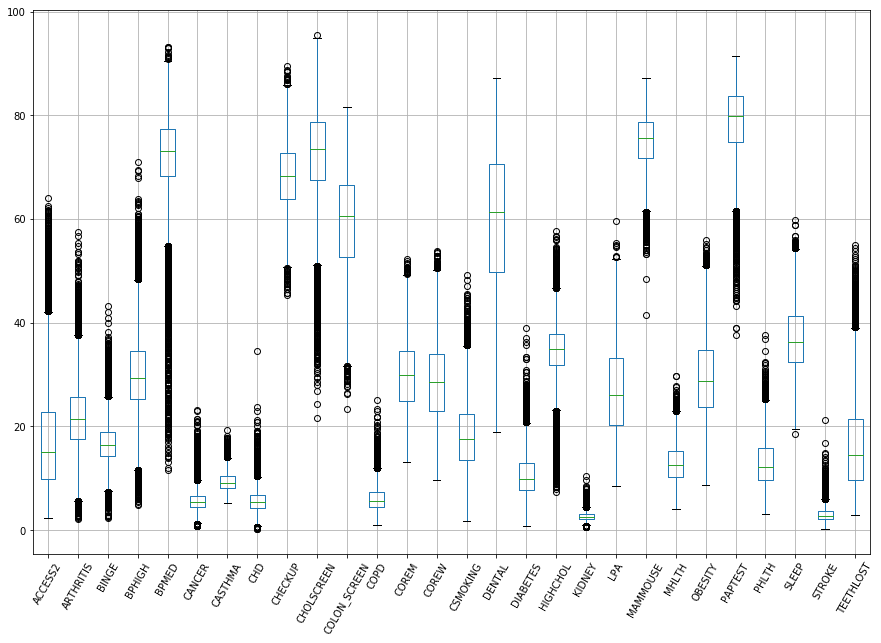

In [15]:
# plot data to check for outliers
# this will be used to help determine how to fill missing data
cdc_pivot.boxplot(figsize=(15,10), rot=60)

In [16]:
# fill missing values
for col in list(cdc_pivot.columns):
    cdc_pivot[col] = cdc_pivot[col].fillna(cdc_pivot[col].median())

In [17]:
# create dataframe to merge with cdc_pivot
cdc_add = cdc_tract_df[['UniqueID','PopulationCount','GeoLocation',
                        'TractFIPS','StateAbbr','CityName']].groupby('UniqueID', as_index=False).last()
cdc_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28004 entries, 0 to 28003
Data columns (total 6 columns):
UniqueID           28004 non-null object
PopulationCount    27998 non-null float64
GeoLocation        28004 non-null object
TractFIPS          28004 non-null float64
StateAbbr          28004 non-null object
CityName           28004 non-null object
dtypes: float64(2), object(4)
memory usage: 1.5+ MB


In [18]:
# merge pivot table with additional CDC data
cdc_full = pd.merge(cdc_pivot.reset_index(),cdc_add, how='left', on='UniqueID')

In [19]:
# pull TractID from UniqueID in order to merge with ACS data
cdc_full['TractID'] = cdc_full['UniqueID'].values
for i in range(len(cdc_full.TractID)):
    cdc_full.iloc[i,-1] = cdc_full.iloc[i,-1][8:]
cdc_full.head()

,UniqueID,ACCESS2,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,CASTHMA,CHD,CHECKUP,CHOLSCREEN,COLON_SCREEN,COPD,COREM,COREW,CSMOKING,DENTAL,DIABETES,HIGHCHOL,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PAPTEST,PHLTH,SLEEP,STROKE,TEETHLOST,PopulationCount,GeoLocation,TractFIPS,StateAbbr,CityName,TractID
0,0107000-01073000100,23.9,32.5,10.1,46.2,80.0,5.2,12.7,8.0,76.3,72.3,54.2,11.0,28.2,25.2,30.6,40.9,17.8,40.4,3.6,42.3,74.2,18.8,46.7,76.0,19.6,50.4,5.5,30.2,3042.0,"(33.5794328326, -86.7228323926)",1.073000e+09,AL,Birmingham,01073000100
1,0107000-01073000300,28.8,31.3,10.8,45.6,80.3,4.6,11.8,8.2,73.8,69.8,51.3,10.7,25.7,22.7,30.2,39.0,19.2,41.5,3.8,43.7,74.0,18.5,47.0,73.2,20.2,49.4,5.7,33.3,2735.0,"(33.5428208686, -86.752433978)",1.073000e+09,AL,Birmingham,01073000300
2,0107000-01073000400,26.1,34.6,9.5,50.1,82.0,5.2,13.0,8.8,77.5,72.0,52.1,11.7,24.3,21.6,31.5,35.1,21.0,42.3,4.0,44.9,73.6,19.1,48.8,72.8,21.1,52.5,6.5,36.0,3338.0,"(33.5632449633, -86.7640474064)",1.073000e+09,AL,Birmingham,01073000400
3,0107000-01073000500,28.1,37.8,8.6,54.3,84.0,5.8,13.4,10.8,78.8,71.9,52.0,13.2,22.2,19.5,31.9,32.7,24.5,45.0,4.8,47.1,73.2,19.4,49.9,70.8,23.1,52.6,8.2,40.2,2864.0,"(33.5442404594, -86.7749130719)",1.073000e+09,AL,Birmingham,01073000500
4,0107000-01073000700,31.8,38.5,7.4,55.4,83.3,5.7,14.3,11.9,78.7,68.8,48.4,15.2,21.9,17.6,35.2,28.3,26.0,45.0,5.7,50.8,70.5,21.6,52.8,67.6,25.8,54.1,9.6,45.8,2577.0,"(33.5525406139, -86.8016893706)",1.073001e+09,AL,Birmingham,01073000700


In [21]:
cdc_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27204 entries, 0 to 27203
Data columns (total 35 columns):
UniqueID           27204 non-null object
ACCESS2            27204 non-null float64
ARTHRITIS          27204 non-null float64
BINGE              27204 non-null float64
BPHIGH             27204 non-null float64
BPMED              27204 non-null float64
CANCER             27204 non-null float64
CASTHMA            27204 non-null float64
CHD                27204 non-null float64
CHECKUP            27204 non-null float64
CHOLSCREEN         27204 non-null float64
COLON_SCREEN       27204 non-null float64
COPD               27204 non-null float64
COREM              27204 non-null float64
COREW              27204 non-null float64
CSMOKING           27204 non-null float64
DENTAL             27204 non-null float64
DIABETES           27204 non-null float64
HIGHCHOL           27204 non-null float64
KIDNEY             27204 non-null float64
LPA                27204 non-null float64
MAMMOUSE  

## Acquire ACS Data
The American Community Survey data requires a five-step process:
1. Get a complete list of variables
2. Determine which variables to keep
3. Pull desired variable data from the Census Bureau API
4. Convert ACS data to a pandas dataframe
5. Clean and merge ACS data

In [373]:
r = requests.get('https://api.census.gov/data/2015/acs/acs5/subject/variables.json')
acs_vars = r.json()
acs_vars_df = pd.DataFrame(acs_vars['variables'])
acs_vars_df = acs_vars_df.transpose().sort_index().reset_index()

In [374]:
# create ACS variables dataframe w/ unneccessary columns dropped
var_cols = ['index','concept', 'label']
variable_df = acs_vars_df.loc[:, var_cols]

# list of concepts to keep in dataframe
concepts = ['AGE AND SEX', 'SELECTED CHARACTERISTICS OF THE NATIVE AND FOREIGN-BORN POPULATIONS',
            'HOUSEHOLDS AND FAMILIES', 'MARITAL STATUS',
            'EDUCATIONAL ATTAINMENT', 'POVERTY STATUS IN THE PAST 12 MONTHS',
            'SELECTED CHARACTERISTICS OF PEOPLE AT SPECIFIED LEVELS OF POVERTY IN THE PAST 12 MONTHS',
            'DISABILITY CHARACTERISTICS',
            'INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS)',
            'EARNINGS IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS)',
            'EMPLOYMENT STATUS', 'WORK STATUS IN THE PAST 12 MONTHS',
            'OCCUPATION BY SEX FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
            'INDUSTRY BY SEX FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
            'OCCUPANCY CHARACTERISTICS','FINANCIAL CHARACTERISTICS',
            'SELECTED CHARACTERISTICS OF HEALTH INSURANCE COVERAGE IN THE UNITED STATES',
            'SELECTED CHARACTERISTICS OF THE UNINSURED IN THE UNITED STATES',
            'PRIVATE HEALTH INSURANCE COVERAGE BY TYPE', 'PUBLIC HEALTH INSURANCE COVERAGE BY TYPE']

# list of labels to drop from dataframe
drop_labels = ['SELECTED AGE CATEGORIES', 'SUMMARY INDICATORS', 'PERCENT IMPUTED',
               'AGE OF OWN CHILDREN', 'SELECTED HOUSEHOLDS BY TYPE', 'UNITS IN STRUCTURE',
               'Married-couple families'
              ]

# filter variable df
variable_df = variable_df[variable_df.concept.isin(concepts)]

for lab in drop_labels:
    variable_df = variable_df[~variable_df.label.str.contains(lab)]
    
# drop unwanted variables
to_drop = list(range(23,42))
to_drop.extend(list(range(8156,8159)))
to_drop.extend([8164, 8176, 8177, 8184, 8189, 8190, 8194, 
                8195, 8196, 8197, 8199, 8204, 8209, 8210,
                8214, 8215, 8216, 8217, 8219, 8224, 8229,
                8230, 8244, 8249, 8250, 10678, 10689, 10690,
                13854, 16279, 59, 95
               ])
to_drop.extend(list(range(971, 985)))
to_drop.extend(list(range(994, 1108)))
to_drop.extend(list(range(1109, 1382)))
to_drop.extend(list(range(1383, 1519)))
to_drop.extend(list(range(1520, 1656)))
to_drop.extend(list(range(8234,8240)))
to_drop.extend(list(range(8254,8271)))
to_drop.extend(list(range(8271,8286)))
to_drop.extend(list(range(8288,8317)))
to_drop.extend(list(range(8318,8348)))
to_drop.extend(list(range(8350, 8379)))
to_drop.extend(list(range(8381, 8410)))
to_drop.extend(list(range(8411, 8441)))
to_drop.extend(list(range(8876, 8941))) # drop Educational Attainment Groupings
to_drop.extend(list(range(8955, 9069))) # drop Educational Attainment Groupings
to_drop.extend(list(range(9083, 9197))) # drop Educational Attainment Groupings
to_drop.extend(list(range(9211, 9260))) # drop Educational Attainment Groupings
to_drop.extend(list(range(9692, 9738))) # drop Poverty Status Interaction Groupings
to_drop.extend(list(range(9680, 9812))) # drop Poverty Status Interaction Groupings
to_drop.extend(list(range(9814, 9863))) # drop Poverty Status w/ Work Experience Groupings
to_drop.extend(list(range(10163, 10199))) # drop Poverty Char. Groupings
to_drop.extend(list(range(10205, 10234))) # drop Poverty Char. Groupings
to_drop.extend(list(range(10240, 10269))) # drop Poverty Char. Groupings
to_drop.extend(list(range(10275, 10303))) # drop Poverty Char. Groupings
to_drop.extend(list(range(10303, 10442))) # drop Disability Char. Groupings
to_drop.extend(list(range(10444, 10453))) # drop Disability Char. Groupings
to_drop.extend(list(range(10460, 10469))) # drop Disability Char. (% With) Hearing, Age Grouping
to_drop.extend(list(range(10470, 10479))) # drop Disability Char. (% With) Vision, Age Grouping
to_drop.extend(list(range(10480, 10487))) # drop Disability Char. (% With) Cognitive, Age Groupings
to_drop.extend(list(range(10488, 10495))) # drop Disability Char. (% With) Ambulatory, Age Groupings
to_drop.extend(list(range(10496, 10503))) # drop Disability Char. (% With) Self-care, Age Groupings
to_drop.extend(list(range(10504, 10510))) # drop Disability Char. (% With) Independent Living, Age Groupings
to_drop.extend(list(range(10694, 10707))) # drop Income Families/Non-Families Groupings
to_drop.extend(list(range(10726, 10739))) # drop Income Families/Non-Families Groupings
to_drop.extend(list(range(10856, 10876))) # drop Earnings Groupings
to_drop.extend(list(range(10877, 10889))) # drop Earnings Groupings
to_drop.extend(list(range(10890, 10897))) # drop Earnings Groupings
to_drop.extend(list(range(10898, 10910))) # drop Earnings Groupings
to_drop.extend(list(range(10911, 10918))) # drop Earnings Groupings
to_drop.extend(list(range(11683, 11718))) # drop Employment Status Groupings
to_drop.extend(list(range(11719, 11753))) # drop Employment Status Groupings
to_drop.extend(list(range(11754, 11788))) # drop Employment Status Groupings
to_drop.extend(list(range(11789, 11823))) # drop Employment Status Groupings
to_drop.extend(list(range(11943, 11976))) # drop Work Status Groupings
to_drop.extend(list(range(12006, 12141))) # drop Work Status Groupings
to_drop.extend(list(range(12141, 12177))) # drop Occupation Groupings (Totals)
to_drop.extend(list(range(12213, 12249))) # drop Occupation Groupings (% Male)
to_drop.extend(list(range(12285, 12321))) # drop Occupation Groupings (% Female)
to_drop.extend(list(range(12501, 12528))) # drop Industry Groupings (Totals)
to_drop.extend(list(range(12555, 12582))) # drop Industry Groupings (% Male)
to_drop.extend(list(range(12609, 12636))) # drop Industry Groupings (% Female)
to_drop.extend(list(range(13698, 13735))) # drop Occupancy Char. Groupings
to_drop.extend(list(range(13736, 13773))) # drop Occupancy Char. Groupings
to_drop.extend(list(range(13900, 13992))) # drop Financial Char. Groupings
to_drop.extend(list(range(15641, 15779))) # drop Char. of Health Insurance Groupings
to_drop.extend(list(range(15781, 15951))) # drop Char. of Health Insurance Groupings
to_drop.extend(list(range(16161, 16267))) # drop Uninsured Groupings
to_drop.extend(list(range(16282, 16371))) # drop Uninsured groupings
to_drop.extend(list(range(16371, 16430))) # drop Private Health insurance Groupings
to_drop.extend(list(range(16434, 16458))) # drop Private Health Insurance Groupings
to_drop.extend(list(range(16458, 16515))) # drop Public Health Insurance Groupings
to_drop.extend(list(range(16519, 16542))) # drop Public Health Insurance Groupings

variable_df = variable_df.drop(to_drop)
variable_df['label'] = variable_df['label'].str.replace('!!Estimate!!',' | ').str.replace('!!',' | ')

In [375]:
print('Number of variables in the American Communities Survey: ' + str(len(acs_data['variables'].keys())) + ' ')
print('Number of variables chosen: ' + str(len(variable_df.label)))
print('Percent of original: ' + str('{:.2f}'.format(len(variable_df.label)/len(acs_data['variables'].keys())*100)) + '%')
print('Observation-to-Feature Ratio: ' + str(27204//len(variable_df.label)) + '-to-1')

Number of variables in the American Communities Survey: 16557 
Number of variables chosen: 416
Percent of original: 2.51%
Observation-to-Feature Ratio: 65-to-1


In [376]:
# clean up variable dataframe
variable_df.columns = ['api_call', 'concept', 'label']
variable_df.reset_index(inplace=True, drop=True)
variable_df.head()

,api_call,concept,label
0,S0101_C02_002E,AGE AND SEX,Male | AGE | Under 5 years
1,S0101_C02_003E,AGE AND SEX,Male | AGE | 5 to 9 years
2,S0101_C02_004E,AGE AND SEX,Male | AGE | 10 to 14 years
3,S0101_C02_005E,AGE AND SEX,Male | AGE | 15 to 19 years
4,S0101_C02_006E,AGE AND SEX,Male | AGE | 20 to 24 years


In [389]:
# create list of ACS subject codes
subjects = list(variable_df.api_call)

In [268]:
# pull state name and two-digit code from API
stcode = requests.get('https://api.census.gov/data/2015/acs/acs5/subject?get=NAME&for=state:*&key='+ API_KEY)
stcode = stcode.json()

# create dictionary of state code : state name
state_dict = dict(stcode[1:-1]) # drop header and Puerto Rico
state_dict = {v: k for k, v in state_dict.items()}

In [269]:
# generate a dataframe containing unique TractID and State Code from CDC 500 Cities data
tracts = cdc_full[['TractID']].copy()
tracts.head()

,TractID
0,01073000100
1,01073000300
2,01073000400
3,01073000500
4,01073000700


In [390]:
# create function to call ACS API for each state and return a dataframe
def acs_api_to_df(subjects=subjects , state='01', key=API_KEY, tracts=tracts):
    '''
    This function will pull the desired variable data for all
    census tracts in a given state from the American Community
    Survey 5-year Data and return a pandas dataframe matching a
    predefined list of census tracts.
    
    subjects = a list of desired subject codes to include in API call
    state = the two-digit code of the desired U.S. state, District of
            Columbia, or Puerto Rico
    key = the user's Census Bureau API key
    tracts = a pandas Series or DataFrame containing TractID with
             unique, desired census tracts
    '''
    
    # call API
    req = requests.get('https://api.census.gov/data/2015/acs/acs5/subject?get='
                   + subjects[0] +'&for=tract:*&in=state:'
                   + state + '&key='
                   + API_KEY
                  )
    acs_data = req.json()
    
    # initialize dataframe
    headers = acs_data.pop(0)
    acs_df = pd.DataFrame(acs_data, columns=headers)
    acs_df['TractID'] = acs_df['state'] + acs_df['county'] + acs_df['tract']
    
    for sub in subjects[1:]:
        req = requests.get('https://api.census.gov/data/2015/acs/acs5/subject?get='
                           + sub + '&for=tract:*&in=state:'
                           + state + '&key=' 
                           + API_KEY
                          )
        sub_data = req.json()
        
        # read subject data into dataframe
        header = sub_data.pop(0)
        sub_df = pd.DataFrame(sub_data, columns=header)
        sub_df['TractID'] = sub_df['state'] + sub_df['county'] + sub_df['tract']
        
        # merge subject dataframe with ACS dataframe
        acs_df = pd.merge(acs_df, sub_df, on=['TractID','state','county','tract'])
        
        # extract unwanted tract data
        trunc_df = pd.merge(tracts, acs_df, how='inner', on='TractID')
        
    return trunc_df

All attempts to iterate through the state codes and concatenate the dataframes resulted in timeout error. Therefore the dataframes will be created in small groups and then concatenated.

In [270]:
# print state code dictionary for reference
state_dict

{'01': 'Alabama',
 '02': 'Alaska',
 '04': 'Arizona',
 '05': 'Arkansas',
 '06': 'California',
 '08': 'Colorado',
 '09': 'Connecticut',
 '10': 'Delaware',
 '11': 'District of Columbia',
 '12': 'Florida',
 '13': 'Georgia',
 '15': 'Hawaii',
 '16': 'Idaho',
 '17': 'Illinois',
 '18': 'Indiana',
 '19': 'Iowa',
 '20': 'Kansas',
 '21': 'Kentucky',
 '22': 'Louisiana',
 '23': 'Maine',
 '24': 'Maryland',
 '25': 'Massachusetts',
 '26': 'Michigan',
 '27': 'Minnesota',
 '28': 'Mississippi',
 '29': 'Missouri',
 '30': 'Montana',
 '31': 'Nebraska',
 '32': 'Nevada',
 '33': 'New Hampshire',
 '34': 'New Jersey',
 '35': 'New Mexico',
 '36': 'New York',
 '37': 'North Carolina',
 '38': 'North Dakota',
 '39': 'Ohio',
 '40': 'Oklahoma',
 '41': 'Oregon',
 '42': 'Pennsylvania',
 '44': 'Rhode Island',
 '45': 'South Carolina',
 '46': 'South Dakota',
 '47': 'Tennessee',
 '48': 'Texas',
 '49': 'Utah',
 '50': 'Vermont',
 '51': 'Virginia',
 '53': 'Washington',
 '54': 'West Virginia',
 '55': 'Wisconsin',
 '56': 'Wyoming

In [391]:
# pull state data from ACS API
alabama = acs_api_to_df(state='01')
alaska = acs_api_to_df(state='02')

In [392]:
arizona = acs_api_to_df(state='04')

In [393]:
arkansas = acs_api_to_df(state='05')

In [394]:
california = acs_api_to_df(state='06')

In [395]:
colorado = acs_api_to_df(state='08')
connecticut = acs_api_to_df(state='09')

In [396]:
delaware = acs_api_to_df(state='10')
dist_of_columbia = acs_api_to_df(state='11')

In [397]:
florida = acs_api_to_df(state='12')

In [398]:
georgia = acs_api_to_df(state='13')

In [399]:
hawaii = acs_api_to_df(state='15')

In [400]:
idaho = acs_api_to_df(state='16')

In [401]:
illinois = acs_api_to_df(state='17')

In [402]:
indiana = acs_api_to_df(state='18')

In [403]:
iowa =acs_api_to_df(state='19')

In [404]:
kansas = acs_api_to_df(state='20')

In [405]:
kentucky = acs_api_to_df(state='21')

In [406]:
louisiana = acs_api_to_df(state='22')

In [407]:
maine = acs_api_to_df(state='23')

In [408]:
maryland = acs_api_to_df(state='24')

In [409]:
massachusetts= acs_api_to_df(state='25')

In [410]:
michigan = acs_api_to_df(state='26')

In [411]:
minnesota = acs_api_to_df(state='27')

In [412]:
mississippi= acs_api_to_df(state='28')

In [413]:
missouri = acs_api_to_df(state='29')

In [414]:
montana = acs_api_to_df(state='30')

In [415]:
nebraska = acs_api_to_df(state='31')

In [416]:
nevada = acs_api_to_df(state='32')

In [417]:
new_hampshire = acs_api_to_df(state='33')

In [418]:
new_jersey = acs_api_to_df(state='34')

In [419]:
new_mexico = acs_api_to_df(state='35')

In [420]:
new_york = acs_api_to_df(state='36')

In [421]:
north_carolina = acs_api_to_df(state='37')

In [422]:
north_dakota = acs_api_to_df(state='38')

In [424]:
ohio = acs_api_to_df(state='39')

In [425]:
oklahoma = acs_api_to_df(state='40')

In [426]:
oregon = acs_api_to_df(state='41')

In [427]:
pennsylvania = acs_api_to_df(state='42')

In [428]:
rhode_island = acs_api_to_df(state='44')

In [429]:
south_carolina = acs_api_to_df(state='45')

In [430]:
south_dakota = acs_api_to_df(state='46')

In [431]:
tennessee = acs_api_to_df(state='47')

In [432]:
texas = acs_api_to_df(state='48')

In [433]:
utah = acs_api_to_df(state='49')

In [434]:
vermont = acs_api_to_df(state='50')

In [435]:
virginia = acs_api_to_df(state='51')

In [436]:
washington = acs_api_to_df(state='53')

In [437]:
west_virginia = acs_api_to_df(state='54')

In [438]:
wisconsin = acs_api_to_df(state='55')

In [439]:
wyoming = acs_api_to_df(state='56')

In [440]:
# create list of state dataframes
state_dfs = [alabama, alaska, arizona, arkansas, california, colorado, 
             connecticut, delaware, dist_of_columbia, florida, georgia,
             hawaii, idaho, illinois, indiana, iowa, kansas, kentucky, 
             louisiana, maine, maryland, massachusetts, michigan, 
             minnesota, mississippi, missouri, montana, nebraska,
             nevada, new_hampshire, new_jersey, new_mexico, new_york,
             north_carolina, north_dakota, ohio, oklahoma, oregon,
             pennsylvania, rhode_island, south_carolina, south_dakota,
             tennessee, texas, utah, vermont, virginia, washington, 
             west_virginia, wisconsin, wyoming
            ]

# combine all states into one dataframe
full_acs_df = pd.concat(state_dfs)

In [441]:
full_acs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26969 entries, 0 to 15
Columns: 420 entries, TractID to S2704_C03_005E
dtypes: object(420)
memory usage: 86.6+ MB


In [442]:
# export ACS data to csv
full_acs_df.to_csv('data/acs_data.csv')

## Clean the Datasets

In [444]:
full_acs_df = pd.read_csv('data/acs_data.csv', index_col=0)
full_acs_df.head()

,TractID,S0101_C02_002E,state,county,tract,S0101_C02_003E,S0101_C02_004E,S0101_C02_005E,S0101_C02_006E,S0101_C02_007E,S0101_C02_008E,S0101_C02_009E,S0101_C02_010E,S0101_C02_011E,S0101_C02_012E,S0101_C02_013E,S0101_C02_014E,S0101_C02_015E,S0101_C02_016E,S0101_C02_017E,S0101_C02_018E,S0101_C02_019E,S0101_C03_002E,S0101_C03_003E,S0101_C03_004E,S0101_C03_005E,S0101_C03_006E,S0101_C03_007E,S0101_C03_008E,S0101_C03_009E,S0101_C03_010E,S0101_C03_011E,S0101_C03_012E,S0101_C03_013E,S0101_C03_014E,S0101_C03_015E,S0101_C03_016E,S0101_C03_017E,S0101_C03_018E,S0101_C03_019E,S0501_C01_015E,S0501_C01_016E,S0501_C01_017E,S0501_C01_018E,S0501_C01_019E,S0501_C01_020E,S0501_C01_021E,S0501_C01_022E,S0501_C01_023E,S0501_C02_001E,S0501_C04_001E,S0501_C05_001E,S1101_C01_004E,S1101_C01_014E,S1101_C01_015E,S1101_C01_019E,S1101_C01_020E,S1101_C02_003E,S1101_C02_004E,S1101_C03_003E,S1101_C04_003E,S1201_C02_001E,S1201_C04_001E,S1201_C05_001E,S1501_C02_002E,S1501_C02_003E,S1501_C02_004E,S1501_C02_005E,S1501_C02_006E,S1501_C02_007E,S1501_C02_008E,S1501_C02_009E,S1501_C02_010E,S1501_C02_011E,S1501_C02_012E,S1501_C02_013E,S1501_C02_014E,S1501_C02_015E,S1501_C04_002E,S1501_C04_003E,S1501_C04_004E,S1501_C04_005E,S1501_C04_006E,S1501_C04_007E,S1501_C04_008E,S1501_C04_009E,S1501_C04_010E,S1501_C04_011E,S1501_C04_012E,S1501_C04_013E,S1501_C04_014E,S1501_C04_015E,S1501_C06_002E,S1501_C06_003E,S1501_C06_004E,S1501_C06_005E,S1501_C06_006E,S1501_C06_007E,S1501_C06_008E,S1501_C06_009E,S1501_C06_010E,S1501_C06_011E,S1501_C06_012E,S1501_C06_013E,S1501_C06_014E,S1501_C06_015E,S1701_C03_011E,S1701_C03_012E,S1703_C02_002E,S1703_C02_003E,S1703_C02_004E,S1703_C02_005E,S1703_C02_006E,S1703_C02_007E,S1703_C03_002E,S1703_C03_003E,S1703_C03_004E,S1703_C03_005E,S1703_C03_006E,S1703_C03_007E,S1703_C04_002E,S1703_C04_003E,S1703_C04_004E,S1703_C04_005E,S1703_C04_006E,S1703_C04_007E,S1810_C03_002E,S1810_C03_003E,S1810_C03_013E,S1810_C03_014E,S1810_C03_015E,S1810_C03_016E,S1810_C03_017E,S1810_C03_018E,S1810_C03_019E,S1810_C03_029E,S1810_C03_039E,S1810_C03_047E,S1810_C03_055E,S1810_C03_063E,S1901_C01_002E,S1901_C01_003E,S1901_C01_004E,S1901_C01_005E,S1901_C01_006E,S1901_C01_007E,S1901_C01_008E,S1901_C01_009E,S1901_C01_010E,S1901_C01_011E,S2001_C02_013E,S2001_C03_013E,S2301_C02_001E,S2301_C03_001E,S2301_C04_001E,S2303_C02_001E,S2303_C02_002E,S2303_C02_003E,S2303_C02_004E,S2303_C02_005E,S2303_C02_006E,S2303_C02_007E,S2303_C02_008E,S2303_C02_009E,S2303_C02_010E,S2303_C02_011E,S2303_C02_012E,S2303_C02_013E,S2303_C02_014E,S2303_C02_015E,S2303_C02_016E,S2303_C02_017E,S2303_C02_018E,S2303_C02_019E,S2303_C02_020E,S2303_C02_021E,S2303_C02_022E,S2303_C02_023E,S2303_C02_024E,S2303_C02_025E,S2303_C02_026E,S2303_C02_027E,S2303_C02_028E,S2303_C02_029E,S2303_C02_030E,S2401_C02_001E,S2401_C02_002E,S2401_C02_003E,S2401_C02_004E,S2401_C02_005E,S2401_C02_006E,S2401_C02_007E,S2401_C02_008E,S2401_C02_009E,S2401_C02_010E,S2401_C02_011E,S2401_C02_012E,S2401_C02_013E,S2401_C02_014E,S2401_C02_015E,S2401_C02_016E,S2401_C02_017E,S2401_C02_018E,S2401_C02_019E,S2401_C02_020E,S2401_C02_021E,S2401_C02_022E,S2401_C02_023E,S2401_C02_024E,S2401_C02_025E,S2401_C02_026E,S2401_C02_027E,S2401_C02_028E,S2401_C02_029E,S2401_C02_030E,S2401_C02_031E,S2401_C02_032E,S2401_C02_033E,S2401_C02_034E,S2401_C02_035E,S2401_C02_036E,S2401_C04_001E,S2401_C04_002E,S2401_C04_003E,S2401_C04_004E,S2401_C04_005E,S2401_C04_006E,S2401_C04_007E,S2401_C04_008E,S2401_C04_009E,S2401_C04_010E,S2401_C04_011E,S2401_C04_012E,S2401_C04_013E,S2401_C04_014E,S2401_C04_015E,S2401_C04_016E,S2401_C04_017E,S2401_C04_018E,S2401_C04_019E,S2401_C04_020E,S2401_C04_021E,S2401_C04_022E,S2401_C04_023E,S2401_C04_024E,S2401_C04_025E,S2401_C04_026E,S2401_C04_027E,S2401_C04_028E,S2401_C04_029E,S2401_C04_030E,S2401_C04_031E,S2401_C04_032E,S2401_C04_033E,S2401_C04_034E,S2401_C04_035E,S2401_C04_036E,S2403_C02_001E,S2403_C02_002E,S2403_C02_003E,S2403_C02_004E,S2403_C02_005E,S2403_C02_006E,S2403_C02_007E,S2403_C02_008E,S2403_C02_009E,S2403_C02_010E,S2403_C02_011E,S2403_C02_01

### Convert feature data types

In [445]:
# convert columns to numerical data
acs_columns = list(full_acs_df.columns)
full_acs_df[acs_columns] = full_acs_df[acs_columns].apply(pd.to_numeric, errors='coerce')
full_acs_df.head()

,TractID,S0101_C02_002E,state,county,tract,S0101_C02_003E,S0101_C02_004E,S0101_C02_005E,S0101_C02_006E,S0101_C02_007E,S0101_C02_008E,S0101_C02_009E,S0101_C02_010E,S0101_C02_011E,S0101_C02_012E,S0101_C02_013E,S0101_C02_014E,S0101_C02_015E,S0101_C02_016E,S0101_C02_017E,S0101_C02_018E,S0101_C02_019E,S0101_C03_002E,S0101_C03_003E,S0101_C03_004E,S0101_C03_005E,S0101_C03_006E,S0101_C03_007E,S0101_C03_008E,S0101_C03_009E,S0101_C03_010E,S0101_C03_011E,S0101_C03_012E,S0101_C03_013E,S0101_C03_014E,S0101_C03_015E,S0101_C03_016E,S0101_C03_017E,S0101_C03_018E,S0101_C03_019E,S0501_C01_015E,S0501_C01_016E,S0501_C01_017E,S0501_C01_018E,S0501_C01_019E,S0501_C01_020E,S0501_C01_021E,S0501_C01_022E,S0501_C01_023E,S0501_C02_001E,S0501_C04_001E,S0501_C05_001E,S1101_C01_004E,S1101_C01_014E,S1101_C01_015E,S1101_C01_019E,S1101_C01_020E,S1101_C02_003E,S1101_C02_004E,S1101_C03_003E,S1101_C04_003E,S1201_C02_001E,S1201_C04_001E,S1201_C05_001E,S1501_C02_002E,S1501_C02_003E,S1501_C02_004E,S1501_C02_005E,S1501_C02_006E,S1501_C02_007E,S1501_C02_008E,S1501_C02_009E,S1501_C02_010E,S1501_C02_011E,S1501_C02_012E,S1501_C02_013E,S1501_C02_014E,S1501_C02_015E,S1501_C04_002E,S1501_C04_003E,S1501_C04_004E,S1501_C04_005E,S1501_C04_006E,S1501_C04_007E,S1501_C04_008E,S1501_C04_009E,S1501_C04_010E,S1501_C04_011E,S1501_C04_012E,S1501_C04_013E,S1501_C04_014E,S1501_C04_015E,S1501_C06_002E,S1501_C06_003E,S1501_C06_004E,S1501_C06_005E,S1501_C06_006E,S1501_C06_007E,S1501_C06_008E,S1501_C06_009E,S1501_C06_010E,S1501_C06_011E,S1501_C06_012E,S1501_C06_013E,S1501_C06_014E,S1501_C06_015E,S1701_C03_011E,S1701_C03_012E,S1703_C02_002E,S1703_C02_003E,S1703_C02_004E,S1703_C02_005E,S1703_C02_006E,S1703_C02_007E,S1703_C03_002E,S1703_C03_003E,S1703_C03_004E,S1703_C03_005E,S1703_C03_006E,S1703_C03_007E,S1703_C04_002E,S1703_C04_003E,S1703_C04_004E,S1703_C04_005E,S1703_C04_006E,S1703_C04_007E,S1810_C03_002E,S1810_C03_003E,S1810_C03_013E,S1810_C03_014E,S1810_C03_015E,S1810_C03_016E,S1810_C03_017E,S1810_C03_018E,S1810_C03_019E,S1810_C03_029E,S1810_C03_039E,S1810_C03_047E,S1810_C03_055E,S1810_C03_063E,S1901_C01_002E,S1901_C01_003E,S1901_C01_004E,S1901_C01_005E,S1901_C01_006E,S1901_C01_007E,S1901_C01_008E,S1901_C01_009E,S1901_C01_010E,S1901_C01_011E,S2001_C02_013E,S2001_C03_013E,S2301_C02_001E,S2301_C03_001E,S2301_C04_001E,S2303_C02_001E,S2303_C02_002E,S2303_C02_003E,S2303_C02_004E,S2303_C02_005E,S2303_C02_006E,S2303_C02_007E,S2303_C02_008E,S2303_C02_009E,S2303_C02_010E,S2303_C02_011E,S2303_C02_012E,S2303_C02_013E,S2303_C02_014E,S2303_C02_015E,S2303_C02_016E,S2303_C02_017E,S2303_C02_018E,S2303_C02_019E,S2303_C02_020E,S2303_C02_021E,S2303_C02_022E,S2303_C02_023E,S2303_C02_024E,S2303_C02_025E,S2303_C02_026E,S2303_C02_027E,S2303_C02_028E,S2303_C02_029E,S2303_C02_030E,S2401_C02_001E,S2401_C02_002E,S2401_C02_003E,S2401_C02_004E,S2401_C02_005E,S2401_C02_006E,S2401_C02_007E,S2401_C02_008E,S2401_C02_009E,S2401_C02_010E,S2401_C02_011E,S2401_C02_012E,S2401_C02_013E,S2401_C02_014E,S2401_C02_015E,S2401_C02_016E,S2401_C02_017E,S2401_C02_018E,S2401_C02_019E,S2401_C02_020E,S2401_C02_021E,S2401_C02_022E,S2401_C02_023E,S2401_C02_024E,S2401_C02_025E,S2401_C02_026E,S2401_C02_027E,S2401_C02_028E,S2401_C02_029E,S2401_C02_030E,S2401_C02_031E,S2401_C02_032E,S2401_C02_033E,S2401_C02_034E,S2401_C02_035E,S2401_C02_036E,S2401_C04_001E,S2401_C04_002E,S2401_C04_003E,S2401_C04_004E,S2401_C04_005E,S2401_C04_006E,S2401_C04_007E,S2401_C04_008E,S2401_C04_009E,S2401_C04_010E,S2401_C04_011E,S2401_C04_012E,S2401_C04_013E,S2401_C04_014E,S2401_C04_015E,S2401_C04_016E,S2401_C04_017E,S2401_C04_018E,S2401_C04_019E,S2401_C04_020E,S2401_C04_021E,S2401_C04_022E,S2401_C04_023E,S2401_C04_024E,S2401_C04_025E,S2401_C04_026E,S2401_C04_027E,S2401_C04_028E,S2401_C04_029E,S2401_C04_030E,S2401_C04_031E,S2401_C04_032E,S2401_C04_033E,S2401_C04_034E,S2401_C04_035E,S2401_C04_036E,S2403_C02_001E,S2403_C02_002E,S2403_C02_003E,S2403_C02_004E,S2403_C02_005E,S2403_C02_006E,S2403_C02_007E,S2403_C02_008E,S2403_C02_009E,S2403_C02_010E,S2403_C02_011E,S2403_C02_01

Several of the columns seem to encode missing values with large negative numbers (e.g. -8888888.0). We will convert these to NaN and the drop all columns that are missing more than 55% of the values.

In [446]:
# convert negative numbers to NaN
full_acs_df[full_acs_df < 0] = np.nan

In [447]:
# drop columns with more than 55% of the data missing
full_acs_clean = full_acs_df.dropna(thresh=15000, axis=1).copy()

In [448]:
full_acs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26969 entries, 0 to 15
Columns: 373 entries, TractID to S2704_C03_005E
dtypes: float64(236), int64(137)
memory usage: 77.0 MB


TractID           AxesSubplot(0.125,0.871592;0.133621x0.00840757)   
S0101_C02_002E    AxesSubplot(0.285345,0.871592;0.133621x0.00840757)
state             AxesSubplot(0.44569,0.871592;0.133621x0.00840757) 
county            AxesSubplot(0.606034,0.871592;0.133621x0.00840757)
tract             AxesSubplot(0.766379,0.871592;0.133621x0.00840757)
S0101_C02_003E    AxesSubplot(0.125,0.861503;0.133621x0.00840757)   
S0101_C02_004E    AxesSubplot(0.285345,0.861503;0.133621x0.00840757)
S0101_C02_005E    AxesSubplot(0.44569,0.861503;0.133621x0.00840757) 
S0101_C02_006E    AxesSubplot(0.606034,0.861503;0.133621x0.00840757)
S0101_C02_007E    AxesSubplot(0.766379,0.861503;0.133621x0.00840757)
S0101_C02_008E    AxesSubplot(0.125,0.851414;0.133621x0.00840757)   
S0101_C02_009E    AxesSubplot(0.285345,0.851414;0.133621x0.00840757)
S0101_C02_010E    AxesSubplot(0.44569,0.851414;0.133621x0.00840757) 
S0101_C02_011E    AxesSubplot(0.606034,0.851414;0.133621x0.00840757)
S0101_C02_012E    AxesSubplot(0.76

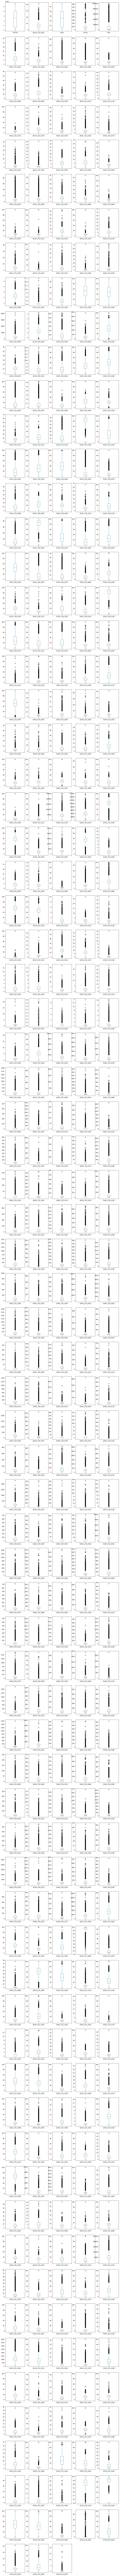

In [452]:
# create boxplots of data to get general view
full_acs_clean.plot(subplots=True, layout=(75, 5), figsize=(15, 350), sharex=False, kind='box')

In [459]:
variable_df[variable_df.api_call == 'S2001_C02_013E']

,api_call,concept,label
146,S2001_C02_013E,EARNINGS IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS),Male | Median earnings (dollars)


In [457]:
# print summary info on any missing data
print('Missing Data')
print('-'*50)
n = 26969

for col in list(full_acs_clean.columns):
    if n - full_acs_clean[col].count() > 0:
        print(col + '\n  Missing: ' + str(n - full_acs_clean[col].count()) + ' | ' + '{:.2f}'.format((n-full_acs_clean[col].count())/n*100) + '%')

Missing Data
--------------------------------------------------
S0101_C02_002E
  Missing: 3 | 0.01%
S0101_C02_003E
  Missing: 3 | 0.01%
S0101_C02_004E
  Missing: 3 | 0.01%
S0101_C02_005E
  Missing: 3 | 0.01%
S0101_C02_006E
  Missing: 3 | 0.01%
S0101_C02_007E
  Missing: 3 | 0.01%
S0101_C02_008E
  Missing: 3 | 0.01%
S0101_C02_009E
  Missing: 3 | 0.01%
S0101_C02_010E
  Missing: 3 | 0.01%
S0101_C02_011E
  Missing: 3 | 0.01%
S0101_C02_012E
  Missing: 3 | 0.01%
S0101_C02_013E
  Missing: 3 | 0.01%
S0101_C02_014E
  Missing: 3 | 0.01%
S0101_C02_015E
  Missing: 3 | 0.01%
S0101_C02_016E
  Missing: 3 | 0.01%
S0101_C02_017E
  Missing: 3 | 0.01%
S0101_C02_018E
  Missing: 3 | 0.01%
S0101_C02_019E
  Missing: 3 | 0.01%
S0101_C03_002E
  Missing: 13 | 0.05%
S0101_C03_003E
  Missing: 13 | 0.05%
S0101_C03_004E
  Missing: 13 | 0.05%
S0101_C03_005E
  Missing: 13 | 0.05%
S0101_C03_006E
  Missing: 13 | 0.05%
S0101_C03_007E
  Missing: 13 | 0.05%
S0101_C03_008E
  Missing: 13 | 0.05%
S0101_C03_009E
  Missing: 13 

In [460]:
# fill missing ACS data with the median of each column
for col in list(full_acs_clean.columns):
    full_acs_clean[col].fillna((full_acs_clean[col].median()), inplace=True)

In [477]:
cdc_full['TractID'] = pd.to_numeric(cdc_full['TractID'], downcast='integer')

In [465]:
# fill missing data CDC data with the median of each column
for col in list(cdc_full.iloc[:,1:29].columns):
    cdc_full[col].fillna((cdc_full[col].median()), inplace=True)

# Combine the datasets

In [478]:
# concatenate the ACS and CDC dataframes
complete_df = pd.merge(cdc_full, full_acs_clean, how='right', on='TractID')
complete_df.head()

,UniqueID,ACCESS2,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,CASTHMA,CHD,CHECKUP,CHOLSCREEN,COLON_SCREEN,COPD,COREM,COREW,CSMOKING,DENTAL,DIABETES,HIGHCHOL,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PAPTEST,PHLTH,SLEEP,STROKE,TEETHLOST,PopulationCount,GeoLocation,TractFIPS,StateAbbr,CityName,TractID,S0101_C02_002E,state,county,tract,S0101_C02_003E,S0101_C02_004E,S0101_C02_005E,S0101_C02_006E,S0101_C02_007E,S0101_C02_008E,S0101_C02_009E,S0101_C02_010E,S0101_C02_011E,S0101_C02_012E,S0101_C02_013E,S0101_C02_014E,S0101_C02_015E,S0101_C02_016E,S0101_C02_017E,S0101_C02_018E,S0101_C02_019E,S0101_C03_002E,S0101_C03_003E,S0101_C03_004E,S0101_C03_005E,S0101_C03_006E,S0101_C03_007E,S0101_C03_008E,S0101_C03_009E,S0101_C03_010E,S0101_C03_011E,S0101_C03_012E,S0101_C03_013E,S0101_C03_014E,S0101_C03_015E,S0101_C03_016E,S0101_C03_017E,S0101_C03_018E,S0101_C03_019E,S1101_C01_004E,S1101_C01_014E,S1101_C01_015E,S1101_C01_019E,S1101_C01_020E,S1101_C02_003E,S1101_C02_004E,S1101_C03_003E,S1101_C04_003E,S1201_C02_001E,S1201_C04_001E,S1201_C05_001E,S1501_C02_002E,S1501_C02_003E,S1501_C02_004E,S1501_C02_005E,S1501_C02_007E,S1501_C02_008E,S1501_C02_009E,S1501_C02_010E,S1501_C02_011E,S1501_C02_012E,S1501_C02_013E,S1501_C02_014E,S1501_C02_015E,S1501_C04_002E,S1501_C04_003E,S1501_C04_004E,S1501_C04_005E,S1501_C04_007E,S1501_C04_008E,S1501_C04_009E,S1501_C04_010E,S1501_C04_011E,S1501_C04_012E,S1501_C04_013E,S1501_C04_014E,S1501_C04_015E,S1501_C06_002E,S1501_C06_003E,S1501_C06_004E,S1501_C06_005E,S1501_C06_007E,S1501_C06_008E,S1501_C06_009E,S1501_C06_010E,S1501_C06_011E,S1501_C06_012E,S1501_C06_013E,S1501_C06_014E,S1501_C06_015E,S1701_C03_011E,S1701_C03_012E,S1810_C03_002E,S1810_C03_003E,S1810_C03_013E,S1810_C03_014E,S1810_C03_015E,S1810_C03_016E,S1810_C03_017E,S1810_C03_018E,S1810_C03_019E,S1810_C03_029E,S1810_C03_039E,S1810_C03_047E,S1810_C03_055E,S1810_C03_063E,S1901_C01_002E,S1901_C01_003E,S1901_C01_004E,S1901_C01_005E,S1901_C01_006E,S1901_C01_007E,S1901_C01_008E,S1901_C01_009E,S1901_C01_010E,S1901_C01_011E,S2001_C02_013E,S2001_C03_013E,S2301_C02_001E,S2301_C03_001E,S2301_C04_001E,S2303_C02_001E,S2303_C02_002E,S2303_C02_003E,S2303_C02_004E,S2303_C02_005E,S2303_C02_006E,S2303_C02_007E,S2303_C02_008E,S2303_C02_009E,S2303_C02_010E,S2303_C02_011E,S2303_C02_012E,S2303_C02_013E,S2303_C02_014E,S2303_C02_015E,S2303_C02_016E,S2303_C02_017E,S2303_C02_018E,S2303_C02_019E,S2303_C02_020E,S2303_C02_021E,S2303_C02_022E,S2303_C02_023E,S2303_C02_024E,S2303_C02_025E,S2303_C02_026E,S2303_C02_027E,S2303_C02_028E,S2303_C02_029E,S2303_C02_030E,S2401_C02_001E,S2401_C02_002E,S2401_C02_003E,S2401_C02_004E,S2401_C02_005E,S2401_C02_006E,S2401_C02_007E,S2401_C02_008E,S2401_C02_009E,S2401_C02_010E,S2401_C02_011E,S2401_C02_012E,S2401_C02_013E,S2401_C02_014E,S2401_C02_015E,S2401_C02_016E,S2401_C02_017E,S2401_C02_018E,S2401_C02_019E,S2401_C02_020E,S2401_C02_021E,S2401_C02_022E,S2401_C02_023E,S2401_C02_024E,S2401_C02_025E,S2401_C02_026E,S2401_C02_027E,S2401_C02_028E,S2401_C02_029E,S2401_C02_030E,S2401_C02_031E,S2401_C02_032E,S2401_C02_033E,S2401_C02_034E,S2401_C02_035E,S2401_C02_036E,S2401_C04_001E,S2401_C04_002E,S2401_C04_003E,S2401_C04_004E,S2401_C04_005E,S2401_C04_006E,S2401_C04_007E,S2401_C04_008E,S2401_C04_009E,S2401_C04_010E,S2401_C04_011E,S2401_C04_012E,S2401_C04_013E,S2401_C04_014E,S2401_C04_015E,S2401_C04_016E,S2401_C04_017E,S2401_C04_018E,S2401_C04_019E,S2401_C04_020E,S2401_C04_021E,S2401_C04_022E,S2401_C04_023E,S2401_C04_024E,S2401_C04_025E,S2401_C04_026E,S2401_C04_027E,S2401_C04_028E,S2401_C04_029E,S2401_C04_030E,S2401_C04_031E,S2401_C04_032E,S2401_C04_033E,S2401_C04_034E,S2401_C04_035E,S2401_C04_036E,S2403_C02_001E,S2403_C02_002E,S2403_C02_003E,S2403_C02_004E,S2403_C02_005E,S2403_C02_006E,S2403_C02_007E,S2403_C02_008E,S2403_C02_009E,S2403_C02_010E,S2403_C02_011E,S2403_C02_012E,S2403_C02_013E,S2403_C02_014E,S2403_C02_015E,S2403_C02_016E,S2403_C02_017E,S2403_C02_018E,S2403_C02_019E,S2403_C02_020E,S2403_C02_021E,S2403_C02_022E,S2403_C02_023E,S2403_C02_024E,S2403_C02_025E,S2403_C02_026E,S2403_

In [479]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27457 entries, 0 to 27456
Columns: 407 entries, UniqueID to S2704_C03_005E
dtypes: float64(266), int64(137), object(4)
memory usage: 85.5+ MB


In [480]:
# save dataframe as csv file
complete_df.to_csv('data/all_final_data.csv')